Task1_0726. 신용카드 사기 검출 모델을 아래와 같이 생성하고 평가하세요.

- 데이터 일차 가공 및 모델 학습/예측/평가
  - Time 컬럼 삭제, 로지스틱 회귀, LightGBM을 이용하여 모델링 및 평가

- Amount 컬럼 데이터 분포도 변환 후 모델 학습/예측/평가
  - 표준화한 후 로지스틱 회귀, LightGBM을 이용하여 모델링 및 평가

- 이상치 데이터 제거 후 모델 학습/예측/평가
  - 데이터의 상관관계를 시각화 V14와 클래스의 상관관계 높음을 확인 후 V14 컬럼의 이상치 제거한 후 로지스틱 회귀, LightGBM을 이용하여 모델링 및 평가

- SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가
  - 불균형한 데이터셋 처리를 위한 imbalanced-learn 라이브러리를 설치
  - %pip install imbalanced-learn
  - SMOTE(Synthetic Minority Over-sampling Technique)를 사용하여 불균형한 데이터셋을 처리
  - from imblearn.over_sampling import SMOTE
  - smote = SMOTE(random_state=0)
  - X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
  - SMOTE를 적용한 학습 데이터셋을 사용하여 로지스틱 회귀 모델을 학습하고 예측 성능을 평가
  - Precision-Recall 커브를 시각화하는 함수
  - LightGBM을 이용하여 모델링 및 평가

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 파일 read
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/creditcard.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df['Class'].unique()

array([0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

# 사용자 함수
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    confusion = confusion_matrix(y_test, y_pred)

    print(f'모델명: {model.__class__.__name__}')
    print(f'오차행렬:\n{confusion:}')
    print(f'정확도: {accuracy:.4f}')
    print(f'정밀도:{precision:.4f}')
    print(f'재현율:{recall:.4f}')
    print(f'F1 score:{f1:.4f}')
    print(f'ROC-AUC:{roc_auc:.4f}')
    print('')

In [ ]:
df1 = df.copy()
# 데이터 일차 가공 및 모델 학습/예측/평가 : Time 컬럼 삭제, 로지스틱 회귀, LightGBM을 이용하여 모델링 및 평가
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

df1.drop('Time', axis=1, inplace=True)

X = df1.drop('Class', axis=1)
y = df1['Class']

X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lg_clf = LogisticRegression()
lgbm_clf = LGBMClassifier()

train_and_evaluate(lg_clf, X_trian, X_test, y_train, y_test)
train_and_evaluate(lgbm_clf, X_trian, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


모델명: LogisticRegression
오차행렬:
[[56851    13]
 [   44    54]]
정확도: 0.9990
정밀도:0.8060
재현율:0.5510
F1 score:0.6545
ROC-AUC:0.9556

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
모델명: LGBMClassifier
오차행렬:
[[56238   626]
 [   47    51]]
정확도: 0.9882
정밀도:0.0753
재현율:0.5204
F1 score:0.1316
ROC-AUC:0.6835



In [ ]:
df2 = df1.copy()
# Amount 컬럼 데이터 분포도 변환 후 모델 학습/예측/평가 : 표준화한 후 로지스틱 회귀, LightGBM을 이용하여 모델링 및 평가
from sklearn.preprocessing import StandardScaler

df2['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

X = df2.drop('Class', axis=1)
y = df2['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

train_and_evaluate(lg_clf, X_train, X_test, y_train, y_test)
train_and_evaluate(lgbm_clf, X_train, X_test, y_train, y_test)

모델명: LogisticRegression
오차행렬:
[[85295    12]
 [   51    85]]
정확도: 0.9993
정밀도:0.8763
재현율:0.6250
F1 score:0.7296
ROC-AUC:0.9804

[LightGBM] [Info] Number of positive: 356, number of negative: 199008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001786 -> initscore=-6.326170
[LightGBM] [Info] Start training from score -6.326170
모델명: LGBMClassifier
오차행렬:
[[85194   113]
 [   47    89]]
정확도: 0.9981
정밀도:0.4406
재현율:0.6544
F1 score:0.5266
ROC-AUC:0.7932



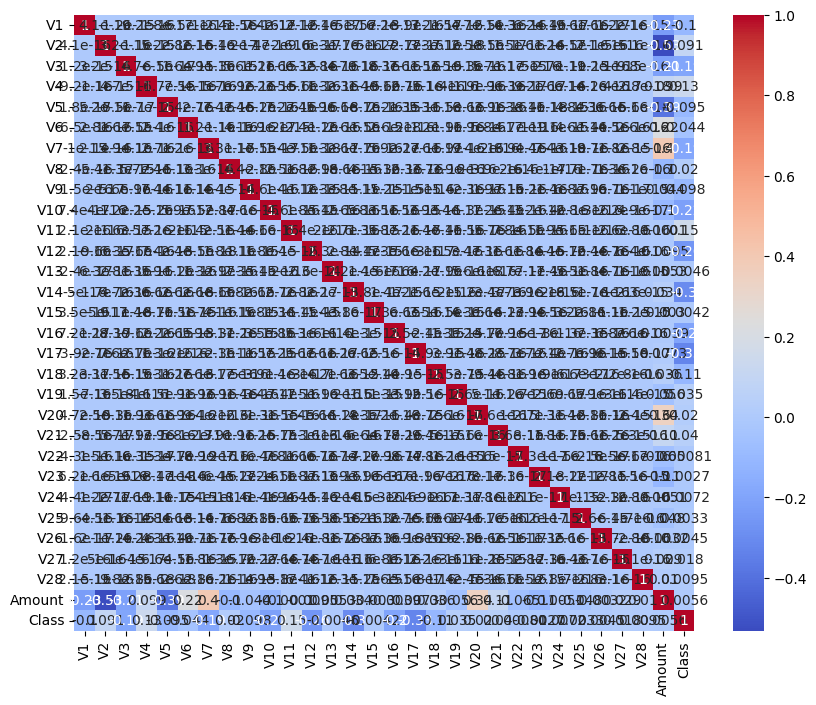

모델명: LogisticRegression
오차행렬:
[[56855     9]
 [   41    57]]
정확도: 0.9991
정밀도:0.8636
재현율:0.5816
F1 score:0.6951
ROC-AUC:0.9762

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
모델명: LGBMClassifier
오차행렬:
[[56754   110]
 [   63    35]]
정확도: 0.9970
정밀도:0.2414
재현율:0.3571
F1 score:0.2881
ROC-AUC:0.4867



In [ ]:
df3 = df2.copy()

# 이상치 데이터 제거 후 모델 학습/예측/평가 : 데이터의 상관관계를 시각화 V14와 클래스의 상관관계 높음을 확인 후 V14 컬럼의 이상치 제거한 후 로지스틱 회귀, LightGBM을 이용하여 모델링 및 평가
import seaborn as sns
import matplotlib.pyplot as plt


# 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')
plt.show()


# v14 이상치 제거
Q1 = df3['V14'].quantile(0.25)
Q3 = df3['V14'].quantile(0.75)
IQR = Q3 - Q1
df3 = df3[(df3['V14'] >= Q1 - 1.5 * IQR) & (df3['V14'] <= Q3 + 1.5 * IQR)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_and_evaluate(lg_clf, X_train, X_test, y_train, y_test)
train_and_evaluate(lgbm_clf, X_train, X_test, y_train, y_test)

In [ ]:
%pip install imbalanced-learn

In [ ]:
# SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가
# 불균형한 데이터셋 처리를 위한 imbalanced-learn 라이브러리를 설치
# %pip install imbalanced-learn
# SMOTE(Synthetic Minority Over-sampling Technique)를 사용하여 불균형한 데이터셋을 처리
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=0)
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
# SMOTE를 적용한 학습 데이터셋을 사용하여 로지스틱 회귀 모델을 학습하고 예측 성능을 평가
# Precision-Recall 커브를 시각화하는 함수
# LightGBM을 이용하여 모델링 및 평가
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

train_and_evaluate(lg_clf, X_train_over, X_test, y_train_over, y_test)
train_and_evaluate(lgbm_clf, X_train_over, X_test, y_train_over, y_test)


모델명: LogisticRegression
오차행렬:
[[55403  1461]
 [    8    90]]
정확도: 0.9742
정밀도:0.0580
재현율:0.9184
F1 score:0.1092
ROC-AUC:0.9792

[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
모델명: LGBMClassifier
오차행렬:
[[56790    74]
 [   14    84]]
정확도: 0.9985
정밀도:0.5316
재현율:0.8571
F1 score:0.6562
ROC-AUC:0.9702



In [ ]:
# teach
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

card_df = pd.read_csv('/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/creditcard.csv')
card_df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [ ]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [ ]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
# 데이터를 전처리하는 get_preprocessed_df 함수
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [ ]:
y_train.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [ ]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
Class
0    99.827075
1     0.172925
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.827955
1     0.172045
Name: count, dtype: float64


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr_clf = LogisticRegression(max_iter=100, solver='lbfgs', random_state=42)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행.
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[56855     9]
 [   41    57]]
정확도: 0.9991, 정밀도: 0.8636, 재현율: 0.5816,    F1: 0.6951, AUC:0.9761


In [ ]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [ ]:
# np.log1p 함수를 사용하여 'Amount' 피처를 로그 변환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [ ]:
# 이 셀에서는 로그 변환된 'Amount' 피처를 사용하여 로지스틱 회귀와 LightGBM 모델을 다시 학습하고 예측 성능을 평가
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [ ]:
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.113366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

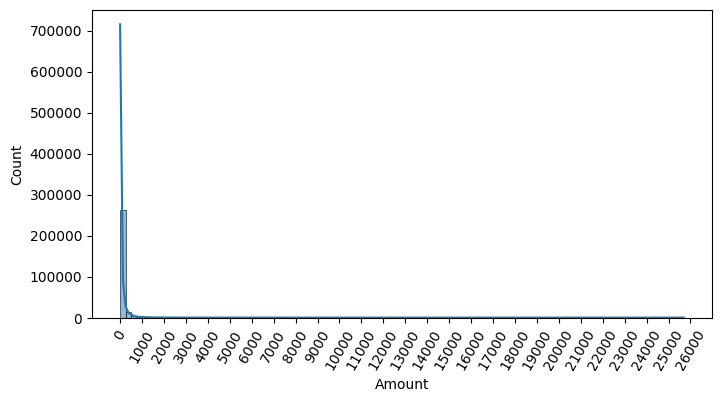

In [ ]:
# 신용카드 거래 금액('Amount')의 히스토그램을 생성
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

<Axes: >

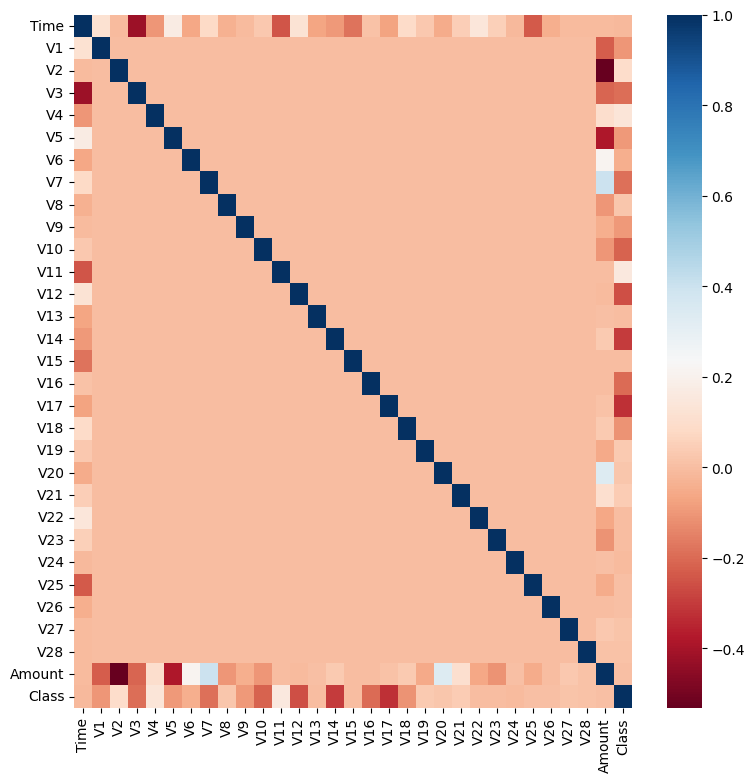

In [ ]:
# 데이터의 상관 관계를 시각화 : v14, v17이 class와 상관관계가 높음
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [ ]:
# 데이터에서 이상치를 찾는 get_outlier 함수를 정의
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함.
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환.
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [ ]:
# get_outlier 함수를 호출하여 'V14' 피처의 이상치 인덱스를 찾고, 이를 출력
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


In [ ]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.154533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [ ]:
# 불균형한 데이터셋 처리를 위한 imbalanced-learn 라이브러리를 설치! pip install imbalanced-learn

In [ ]:
# SMOTE(Synthetic Minority Over-sampling Technique)를 사용하여 불균형한 데이터셋을 처리
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199364, 29) (199364,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 Class
0    199020
1    199020
Name: count, dtype: int64


In [ ]:
#  SMOTE를 적용한 학습 데이터셋을 사용하여 로지스틱 회귀 모델을 학습하고 예측 성능을 평가
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[83317  1978]
 [   15   133]]
정확도: 0.9767, 정밀도: 0.0630, 재현율: 0.8986,    F1: 0.1178, AUC:0.9803


In [ ]:
# Precision-Recall 커브를 시각화하는 함수

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

SMOTE(Synthetic Minority Over-sampling Technique)를 적용한 후에 정밀도가 낮고 재현율이 높은 문제가 발생할 수 있습니다. SMOTE는 소수 클래스 데이터를 인위적으로 생성하여 클래스 불균형을 해결하는 기법입니다. 그러나 이로 인해 모델이 양성(Positive) 클래스를 과도하게 예측하게 되는 경우가 생길 수 있습니다. 이는 많은 거짓 양성(False Positive)을 초래할 수 있으며, 결과적으로 정밀도가 낮아질 수 있습니다.

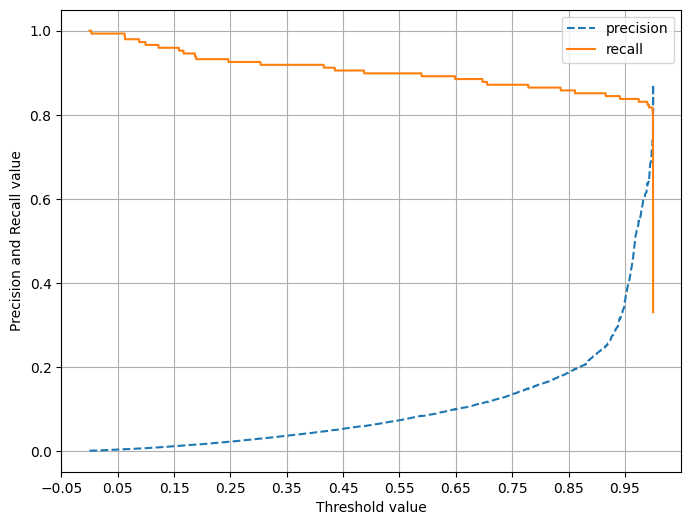

In [ ]:
precision_recall_curve_plot(y_test, pred_proba_c1=lr_clf.predict_proba(X_test)[:, 1])

LightGBM이 SMOTE로 증강된 데이터를 사용하여 모델링할 때 정밀도가 정상이 되는 이유는 다음과 같습니다:
- LightGBM의 강력한 성능: 데이터 처리와 피처 중요도를 잘 반영하는 학습 방식.
- SMOTE와 LightGBM의 시너지 효과: 클래스 불균형 문제를 해결하여 균형 잡힌 모델 학습.
- 모델 튜닝 및 하이퍼파라미터 최적화: 적절한 하이퍼파라미터 설정을 통해 모델 성능 향상

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.123696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split